## 1. CNN 기본 구조

**1) 다음은 CNN의 기본 구조에 대한 설명입니다. 빈칸에 알맞은 답을 채워주세요.**

CNN은 전통적인 Neural Network 앞에 여러 계층의 (ㄱ)와 (ㄴ)가 추가된 형태입니다. <br/><br/>
(ㄱ)에서는 특징을 추출하는 작업이 이루어지는데 이 기능을 하는 것이 바로 (ㄷ)입니다. 입력된 데이터를 (ㄹ)라는 지정된 간격으로 순회하고, 최종 (ㅁ)을 각 채널별로 계산한 후 이를 모두 합산해 활성 함수를 적용한 (ㅂ)을 최종적으로 출력합니다. <br/><br/>
(ㄴ)은 추출한 이미지의 특징을 모으고 강화합니다. 이를 이용할 경우, CNN이 처리해야 할 이미지의 크기가 크게 줄어들어 (ㅅ) 또한 크게 감소함으로써 CNN의 학습 시간을 크게 절약할 수 있습니다.

(ㄱ) : convolution layer<br/> 
(ㄴ) : pooling<br/> 
(ㄷ) : filter<br/> 
(ㄹ) : stride<br/> 
(ㅁ) : 합성곱<br/> 
(ㅂ) : feature map<br/> 
(ㅅ) : model parameter

**2) 다음 설명에 대해 맞으면 T, 틀리면 F를 작성하고 틀린 설명을 바르게 고쳐주세요.**

1) Convolution Layer와 Pooling Layer는 학습대상 parameter가 없다.<br/>
2) 입력 이미지에 대해 합성곱을 수행하면 출력 이미지의 크기는 작아집니다. <br/>
3) Convolution Layer를 거치며 가장자리에 위치한 픽셀 정보들의 유실을 막기 위해 픽셀들을 추가하는 작업을 Padding이라고 한다.<br/>
4) 입력데이터는 channel 수와 상관없이 filter별로 하나의 featumre map이 만들어진다.<br/>
5) 출력데이터는 적용되는 filter의 수와 상관없이 1개의 channel을 갖게 된다.

1) F, filter parameter를 학습한다 <br/>
2) T  <br/>
3) T <br/>
4) T  <br/>
5) F 출력데이터는 filter의 개수와 같은 수의 channel 을 갖는다

## 2. AlexNet의 Parameter 계산


**발표 자료의 AlexNet 구조를 참고하여 AlexNet의 Parameter를 구하는 표의 빈칸을 채워넣으시오.**

- 힌트
   $$W_c = K^2 * C * N$$
   $$B_c = N$$
   $$P_c = W_c + B_c$$
   $W_c$ = Number of weights of the Conv layer \
   $B_c$ = Number of biases of the Conv layer \
   $P_c$ = Number of parameters of the Conv layer \
   $K$ = Size(width) of kernels used in the Conv layer \
   $N$ : Number of kernels \
   $C$ : Number of channels of the input image
   \
   \
   $$W_{cf} = O^2 * N * F$$
   $$B_{cf} = F$$
   $$P_{cf} = W_{cf} + B_{cf}$$
   $W_{cf}$ : Number of weights of a FC layer which is connected to a Conv layer
   \
   $B_{cf}$ : Number of biases of a FC layer whick is connected to a Conv layer
   \
   $P_{cf}$ : Number of parameters of a FC layer which is connected to a Conv layer
   \
   $O$ : Size(width) of the ouput image of the previous Conv layer
   \
   $N$ : Number of kernels in previous Conv layer
   \
   $F$ : Number of neurons in the FC layer
   \
   \
   $$W_{ff} = F_{-1} * F$$
   $$B_{ff} = F$$
   $$P_{ff} = W_{ff} + B_{ff}$$
   $W_{ff}$ : Number of weights of a FC layer whick is connected to a FC layer
   \
   $B_{ff}$: Number of biases of a FC layer which is connected to a FC layer
   \
   $P_{ff}$ : Number of parameters of a FC layer which is connected to a FC layer
   \
   $F$ : Number of neurons in the FC layer
   \
   $F_{-1}$ : Number of neurons in the previous FC layer

 Layer Name | Tensor Size | Weights | Biases | Parameters
------------|------------|------------|------------|------------
Input Image | (227,227,3) | 0 | 0 | 0 
Conv-1 |  (55,55,96)  | 34,848  | 96 |34,944
MaxPool-1 | (27,27,96)  | 0 | 0 |0
Conv-2 |  (27,27,256)  | 614,400  | 256 |614,656
MaxPool-2 |  (13,13,256)  | 0 | 0 |0
Conv-3 |  (13,13,384)  | 884,736  | 384 |885,120
Conv-4 |  (13,13,384)  | 884,400  | 384 |1,327,488
Conv-5 | (13,13,256)  | 884,400  | 256 |884,992
MaxPool-3 | (6,6,256)  | 0 | 0 |0
FC-1 | (4096,1) | 37,748,736 |  4096 | 37,752,832
FC-2 |  (4096,1) | 16,777,216 |  4096 | 16,781,312
FC-3 | (1000,1) | 4,096,000 |  1000 | 4,097,000
Output | (1000,1) | 0|  0 | 0
Total | X | X | 62,378,344 | 

## 3. Alexnet 구조

### 아래 코드는 AlexNet구조 입니다. 해당 코드 아래에 코드에 대한 해설을 주석으로 남겨주세요

### 예시

In [4]:
import numpy as np

In [5]:
#넘파이를 import한다.

##### 모르는 코드가 있다면 구글링과 아래 웹사이트를 참고해보세요!
- https://runebook.dev/
- https://www.tensorflow.org/
##### 빈칸이 없다면 주석을 달지 않으셔도 됩니다!!

In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import time

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 13s 0us/step


In [ ]:
# data 로드해서 train, test 로 split

In [3]:
CLASS_NAMES= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
train_ds=tf.data.Dataset.from_tensor_slices((train_images,train_labels))
test_ds=tf.data.Dataset.from_tensor_slices((test_images,test_labels))

In [ ]:
#  입력된 텐서로부터 slices를 생성

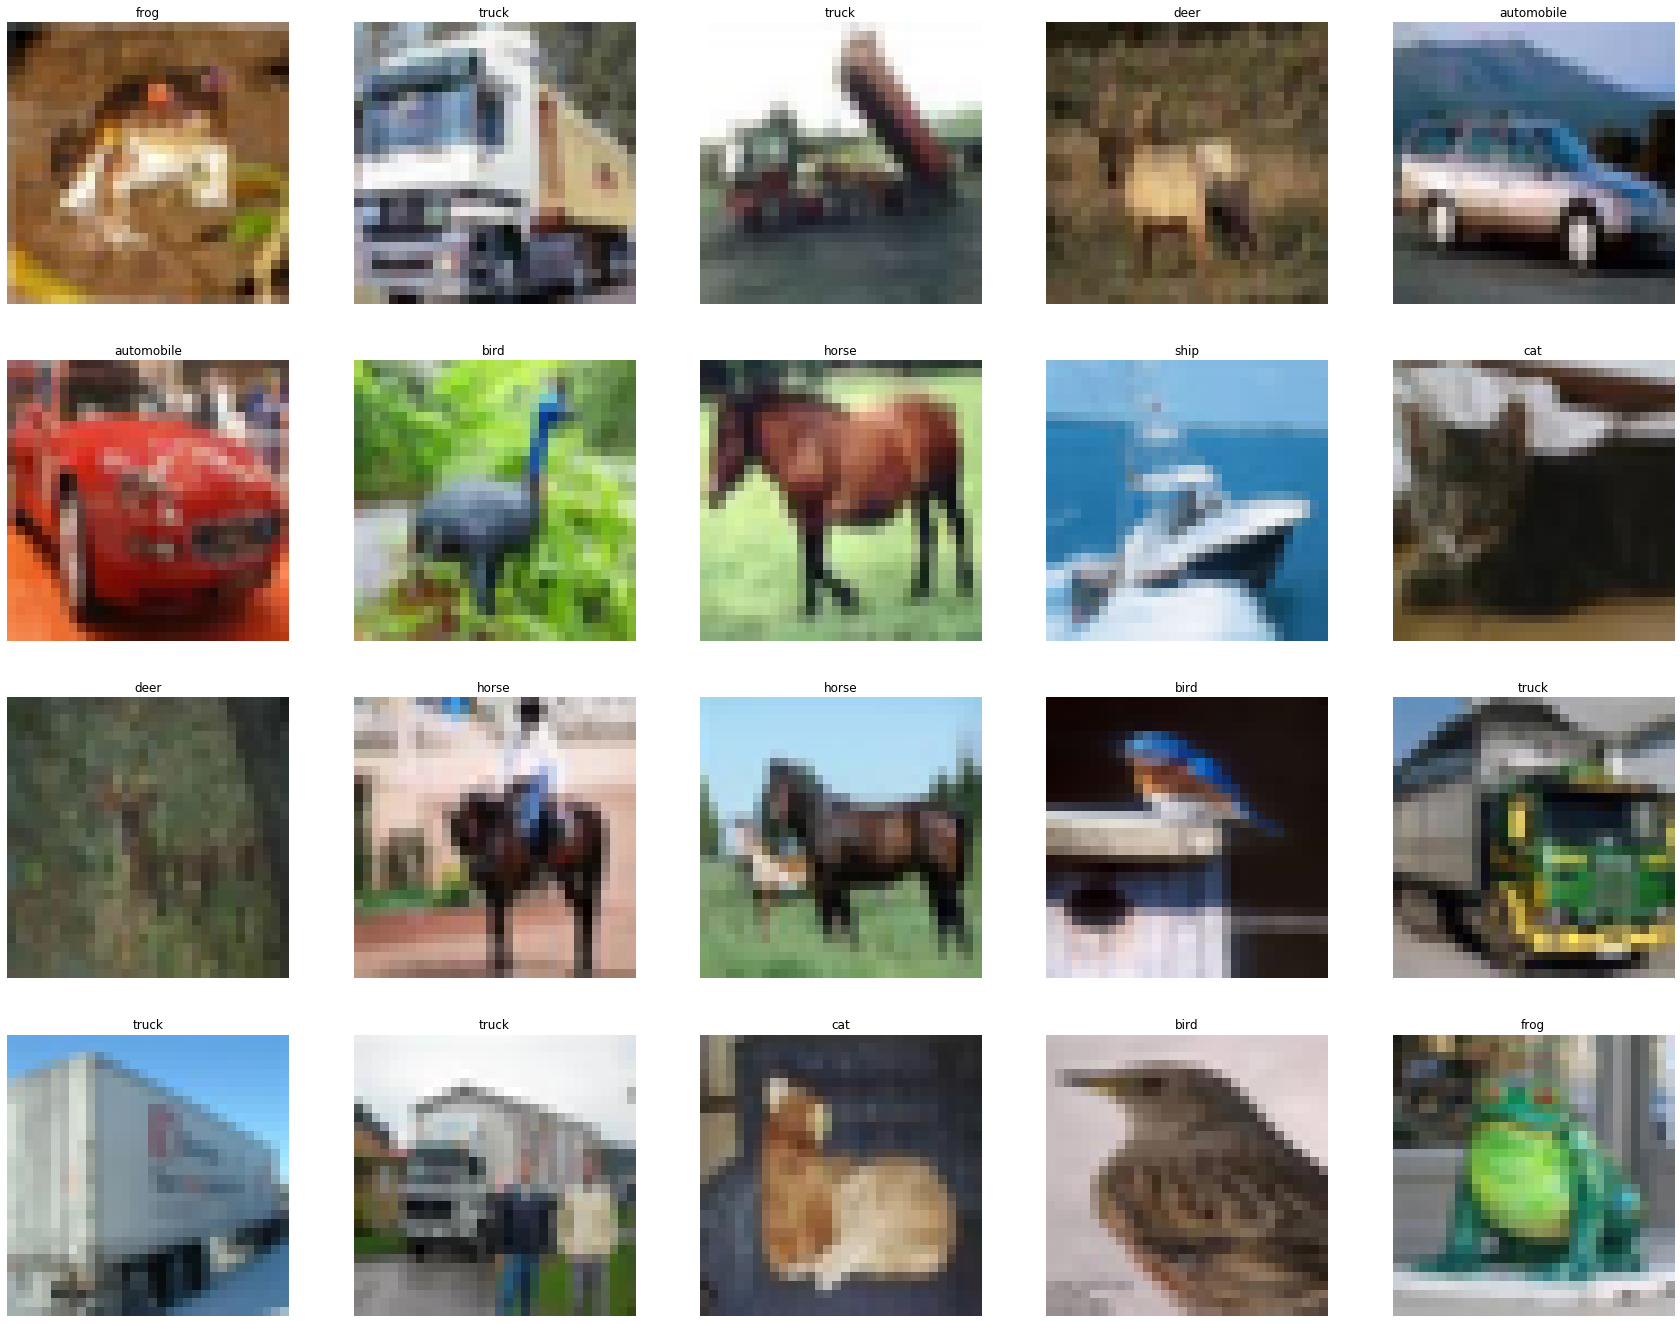

In [5]:
plt.figure(figsize=(30,30))
for i,(image,label) in enumerate(train_ds.take(20)):
    #print(label)
    ax=plt.subplot(5,5,i+1)
    plt.imshow(image)
    plt.title(CLASS_NAMES[label.numpy()[0]])
    plt.axis('off')

In [6]:
def process_image(image,label):
    image=tf.image.per_image_standardization(image)
    image=tf.image.resize(image,(64,64))
    
    return image,label

In [ ]:
#slice된 image data 를 정규화하고 64*64 로 크기를 바꿔줌

In [7]:
train_ds_size=tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size=tf.data.experimental.cardinality(test_ds).numpy()
print('Train size:',train_ds_size)
print('Test size:',test_ds_size)

Train size: 50000
Test size: 10000


In [8]:
train_ds=(train_ds
          .map(process_image)
          .shuffle(buffer_size=train_ds_size)
          .batch(batch_size=32,drop_remainder=True)
         )
test_ds=(test_ds
          .map(process_image)
          .shuffle(buffer_size=test_ds_size)
          .batch(batch_size=32,drop_remainder=True)
         )

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [ ]:
# train, test data 에 proces_image 함수 적용, 랜덤하게 셔플하고, batch_size 32 만큼 데이터를 읽어 들여 학습(batch 나머지가 있다면 버림)

##### 아래 코드는 과정을 간단하게만 서술해주세요! 

In [9]:
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(64,64,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation='softmax')  
    
    
])

In [ ]:
# 학습을 위한 layer 를 쌓는다.

In [10]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.optimizers.SGD(lr=0.001),
    metrics=['accuracy']    
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 128)       46592     
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 128)       512       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 256)         819456    
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 256)         1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 256)         5

In [ ]:
# 손실함수 : 다중 분류 손실함수, optimizer =SGD, accuracy= 훈련을 모니터링하기 위한 지표

##### 시간이 꽤 많이 소요되니 주의해주세요! (저는 한시간 정도 걸린 것 같습니다.)

In [11]:
history=model.fit(
    train_ds,
    epochs=50,
    validation_data=test_ds,
    validation_freq=1
)

Train for 1562 steps, validate for 312 steps
Epoch 1/50
1562/1562 [==============================] - 3898s 2s/step - loss: 2.1868 - accuracy: 0.2333 - val_loss: 1.7006 - val_accuracy: 0.3953
Epoch 2/50
1562/1562 [==============================] - 3265s 2s/step - loss: 1.8051 - accuracy: 0.3435 - val_loss: 1.5487 - val_accuracy: 0.4542
Epoch 3/50
1562/1562 [==============================] - 3626s 2s/step - loss: 1.6459 - accuracy: 0.4055 - val_loss: 1.4504 - val_accuracy: 0.4831
Epoch 4/50
1562/1562 [==============================] - 3493s 2s/step - loss: 1.5351 - accuracy: 0.4468 - val_loss: 1.3967 - val_accuracy: 0.5066
Epoch 5/50
1562/1562 [==============================] - 3296s 2s/step - loss: 1.4392 - accuracy: 0.4825 - val_loss: 1.3229 - val_accuracy: 0.5292
Epoch 6/50
 690/1562 [============>.................] - ETA: 42:51 - loss: 1.3797 - accuracy: 0.5068

KeyboardInterrupt: 

In [ ]:
f,ax=plt.subplots(2,1,figsize=(10,10)) 

#Assigning the first subplot to graph training loss and validation loss
ax[0].plot(model.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(model.history.history['val_loss'],color='r',label='Validation Loss')

#Plotting the training accuracy and validation accuracy
ax[1].plot(model.history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(model.history.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

##### 결과에 대한 해석을 해주시고, 개선방안에 대해서 본인의 의견을 말씀해주세요.

In [ ]:
print('Accuracy Score = ',np.max(history.history['val_accuracy']))

In [ ]:
# epoch 5 까지가 몇시간이 걸려 다 돌려보지 못했습니다. layer를 더 많이 쌓거나 data augmentation 으로 훈련데이터를 더 보강하면 정확도가 개선될 것입니다.

## 4. 기본구조의 CNN 구현해보기

In [13]:
import sys
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.datasets import cifar10 
import numpy as np

Using TensorFlow backend.


### 1) train set과 test set의 데이터 수, 이미지 크기, 채널 수를 확인하세요. 

In [14]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [15]:
# code...
print('x_train shape:', x_train.shape,'x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape,'y_test shape:', y_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3) x_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 1) y_test shape: (10000, 1)
50000 train samples
10000 test samples


In [16]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

* 참고)해당 데이터는 자동차, 비행기 등 10개의 클래스로 라벨링된 데이터입니다.

### 2) 모델설계 - 다음 조건에 맞춰 각 layer의 코드를 작성해주세요. 추가적으로 필요한 조건들은 각 layer에 주석으로 표시해두었습니다.
* convolutional layer의 filter size는 3x3으로 모두 동일하며 패딩을 통해 출력이미지의 사이즈를 입력이미지 사이즈와 동일하게 유지해줍니다. 또한 마지막 layer를 제외한 모든activation function은 모두 relu function을 사용합니다.

In [19]:
model = Sequential()

##--layer 1
### 64개의 filter 사용한 convolutional layer
### 확률 0.5의 dropout layer
# code...
model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same',
                 activation='relu',
                 input_shape=(32,32,3)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

##--layer 2
### 64개의 filter 사용한 convolutional layer
### 확률 0.5의 dropout layer
### 2x2 max pooling
# code...


##--layer 3
### 128개의 filter 사용한 convolutional layer
### 확률 0.5의 dropout layer
### 2x2 max pooling
# code...


##--layer 4                         
### 256개의 filter 사용한 convolutional layer
### 확률 0.5의 dropout layer
### 2x2 max pooling
# code...


##--layer 5 
### 512개의 fully-connected layer
# code...


##--layer 5 
### 512개의 fully-connected layer
# code...


##--layer 7
### softmax function 사용하여 class별 확률 도출
# code...



In [20]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 128)      

### 3) batch size는 512, epoch 수는 30개로 지정하고 모델을 훈련,평가해수세요.(시간이 오래 걸릴 경우 결과값 없이 코드만 제출하셔도 무방합니다.)

In [21]:
# code...
hist = model.fit(x_train, y_train,
                 batch_size=512,
                 epochs=30,
                 verbose=1, 
                 validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 384s 8ms/step - loss: 11.1543 - accuracy: 0.1079 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 2/30
50000/50000 [==============================] - 364s 7ms/step - loss: 2.2659 - accuracy: 0.1278 - val_loss: 2.2886 - val_accuracy: 0.1026
Epoch 3/30
50000/50000 [==============================] - 387s 8ms/step - loss: 2.2000 - accuracy: 0.1542 - val_loss: 2.2977 - val_accuracy: 0.1030
Epoch 4/30
50000/50000 [==============================] - 363s 7ms/step - loss: 2.0918 - accuracy: 0.2006 - val_loss: 2.2793 - val_accuracy: 0.1247
Epoch 5/30
50000/50000 [==============================] - 337s 7ms/step - loss: 1.9838 - accuracy: 0.2462 - val_loss: 2.2607 - val_accuracy: 0.1415
Epoch 6/30
50000/50000 [==============================] - 329s 7ms/step - loss: 1.8914 - accuracy: 0.2839 - val_loss: 2.2434 - val_accuracy: 0.1711
Epoch 7/30
50000/50000 [==============================] - 363

KeyboardInterrupt: 